# LLM Classification Fine-tuning - 데이터 탐색

이 노트북은 Kaggle LLM Classification Fine-tuning 대회의 데이터를 탐색합니다.

**목표**:
- 데이터 구조 이해
- 클래스 분포 확인
- 텍스트 길이 분석
- 모델 분포 확인
- 인사이트 도출

## 1. 라이브러리 임포트 및 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. 데이터 로딩

In [2]:
# 데이터 로드
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

print(f"학습 데이터: {train_df.shape}")
print(f"테스트 데이터: {test_df.shape}")
print(f"제출 샘플: {sample_submission.shape}")

학습 데이터: (57477, 9)
테스트 데이터: (3, 4)
제출 샘플: (3, 4)


In [3]:
sample_submission

,id,winner_model_a,winner_model_b,winner_tie
0,136060,0.333333,0.333333,0.333333
1,211333,0.333333,0.333333,0.333333
2,1233961,0.333333,0.333333,0.333333


## 3. 데이터 구조 확인

In [4]:
# 학습 데이터 정보
print("=" * 60)
print("학습 데이터 정보")
print("=" * 60)
train_df.info()

학습 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              57477 non-null  int64 
 1   model_a         57477 non-null  object
 2   model_b         57477 non-null  object
 3   prompt          57477 non-null  object
 4   response_a      57477 non-null  object
 5   response_b      57477 non-null  object
 6   winner_model_a  57477 non-null  int64 
 7   winner_model_b  57477 non-null  int64 
 8   winner_tie      57477 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB


In [5]:
# 처음 5개 행 확인
print("\n학습 데이터 샘플:")
train_df.head()


학습 데이터 샘플:


,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain percentage of females on managerial positions?"",""...","[""The question of whether it is morally right to aim for a certain percentage of females in mana...","[""As an AI, I don't have personal beliefs or opinions. However, I can tell you that the question...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage license and marriage certificate?"",""How can I get both...","[""A marriage license is a legal document that allows a couple to get married. It is issued by a ...","[""A marriage license and a marriage certificate are two different legal documents that have sepa...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call a function?""]","[""Function calling is the process of invoking or executing a function in a programming language....","[""Function calling is the process of invoking a function in a program. A function is a block of ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare category? I want to build a classifier.""]","[""Creating a test set for a very rare category can be challenging, as it may not be possible to ...","[""When building a classifier for a very rare category, creating a test set can be challenging du...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv to Jerusalem? Car? Bus? Plane?""]","[""The best way to travel from Tel Aviv to Jerusalem depends on your personal preference and the ...","[""The best way to travel from Tel-Aviv to Jerusalem depends on your personal preferences and cir...",0,1,0


In [6]:
# 테스트 데이터 확인
print("\n테스트 데이터 샘플:")
print(f"컬럼: {test_df.columns.tolist()}")
print(f"\n⚠️ 주의: 테스트 데이터에는 model_a, model_b 정보가 없습니다!")
test_df.head()


테스트 데이터 샘플:
컬럼: ['id', 'prompt', 'response_a', 'response_b']

⚠️ 주의: 테스트 데이터에는 model_a, model_b 정보가 없습니다!


,id,prompt,response_a,response_b
0,136060,"[""I have three oranges today, I ate an orange yesterday. How many oranges do I have?""]","[""You have two oranges today.""]","[""You still have three oranges. Eating an orange yesterday does not affect the number of oranges..."
1,211333,"[""You are a mediator in a heated political debate between two opposing parties. Mr Reddy is very...","[""Thank you for sharing the details of the situation. As a mediator, I understand the importance...","[""Mr Reddy and Ms Blue both have valid points in their arguments. On one hand, Mr Reddy is corre..."
2,1233961,"[""How to initialize the classification head when I do transfer learning. For example, I have a p...","[""When you want to initialize the classification head for transfer learning, you can follow thes...","[""To initialize the classification head when performing transfer learning, follow these steps:\n..."


In [7]:
# 결측값 확인
print("\n결측값 확인:")
missing = train_df.isnull().sum()
if missing.sum() == 0:
    print("✓ 결측값 없음")
else:
    print(missing[missing > 0])


결측값 확인:
✓ 결측값 없음


## 4. 클래스 분포 분석

In [8]:
# 클래스 분포
winner_cols = ['winner_model_a', 'winner_model_b', 'winner_tie']
class_counts = train_df[winner_cols].sum()

print("클래스 분포:")
print(class_counts)
print(f"\n비율:")
print(class_counts / len(train_df) * 100)

클래스 분포:
winner_model_a    20064
winner_model_b    19652
winner_tie        17761
dtype: int64

비율:
winner_model_a    34.907876
winner_model_b    34.191068
winner_tie        30.901056
dtype: float64


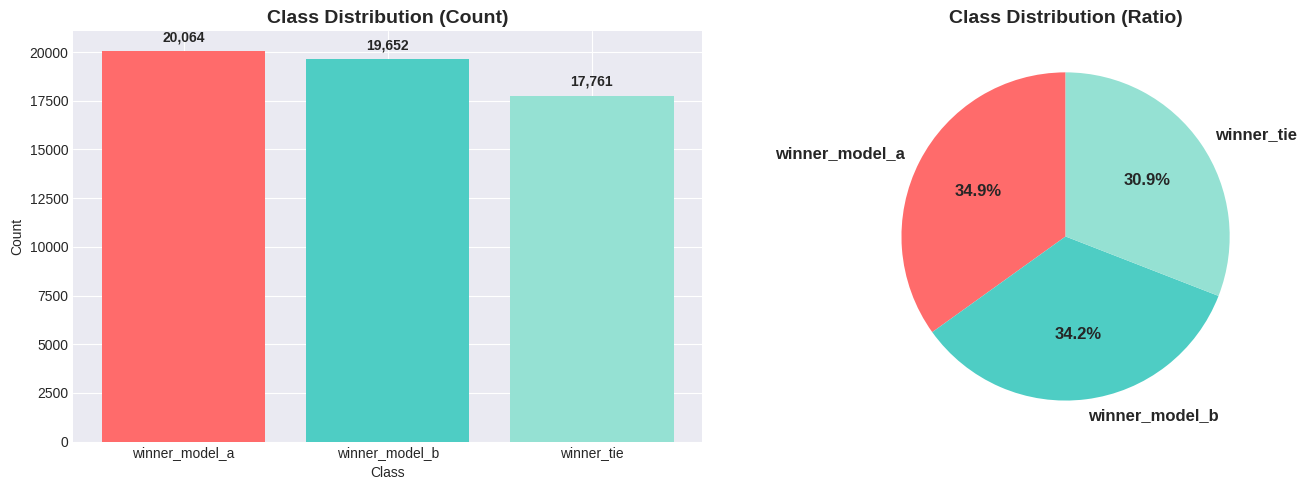


📊 Insight: winner_model_b is the most frequent (19,652 samples, 34.2%)


In [9]:
# Class distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(class_counts.index, class_counts.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Class')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Ratio)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Insight: winner_model_b is the most frequent ({class_counts['winner_model_b']:,} samples, {class_counts['winner_model_b']/len(train_df)*100:.1f}%)")

## 5. 텍스트 길이 분석

In [10]:
# 텍스트 길이 계산
train_df['prompt_len'] = train_df['prompt'].str.len()
train_df['response_a_len'] = train_df['response_a'].str.len()
train_df['response_b_len'] = train_df['response_b'].str.len()
train_df['total_len'] = train_df['prompt_len'] + train_df['response_a_len'] + train_df['response_b_len']

# 통계 요약
print("텍스트 길이 통계:")
train_df[['prompt_len', 'response_a_len', 'response_b_len', 'total_len']].describe()

텍스트 길이 통계:


,prompt_len,response_a_len,response_b_len,total_len
count,57477.000000,57477.000000,57477.000000,57477.000000
mean,369.198584,1377.818919,1386.162169,3133.179672
std,1073.341472,1513.932333,1537.800488,3232.180180
min,7.000000,4.000000,4.000000,26.000000
25%,52.000000,408.000000,413.000000,1218.000000
50%,96.000000,1076.000000,1086.000000,2447.000000
75%,243.000000,1862.000000,1873.000000,3967.000000
max,33056.000000,54058.000000,53830.000000,76468.000000


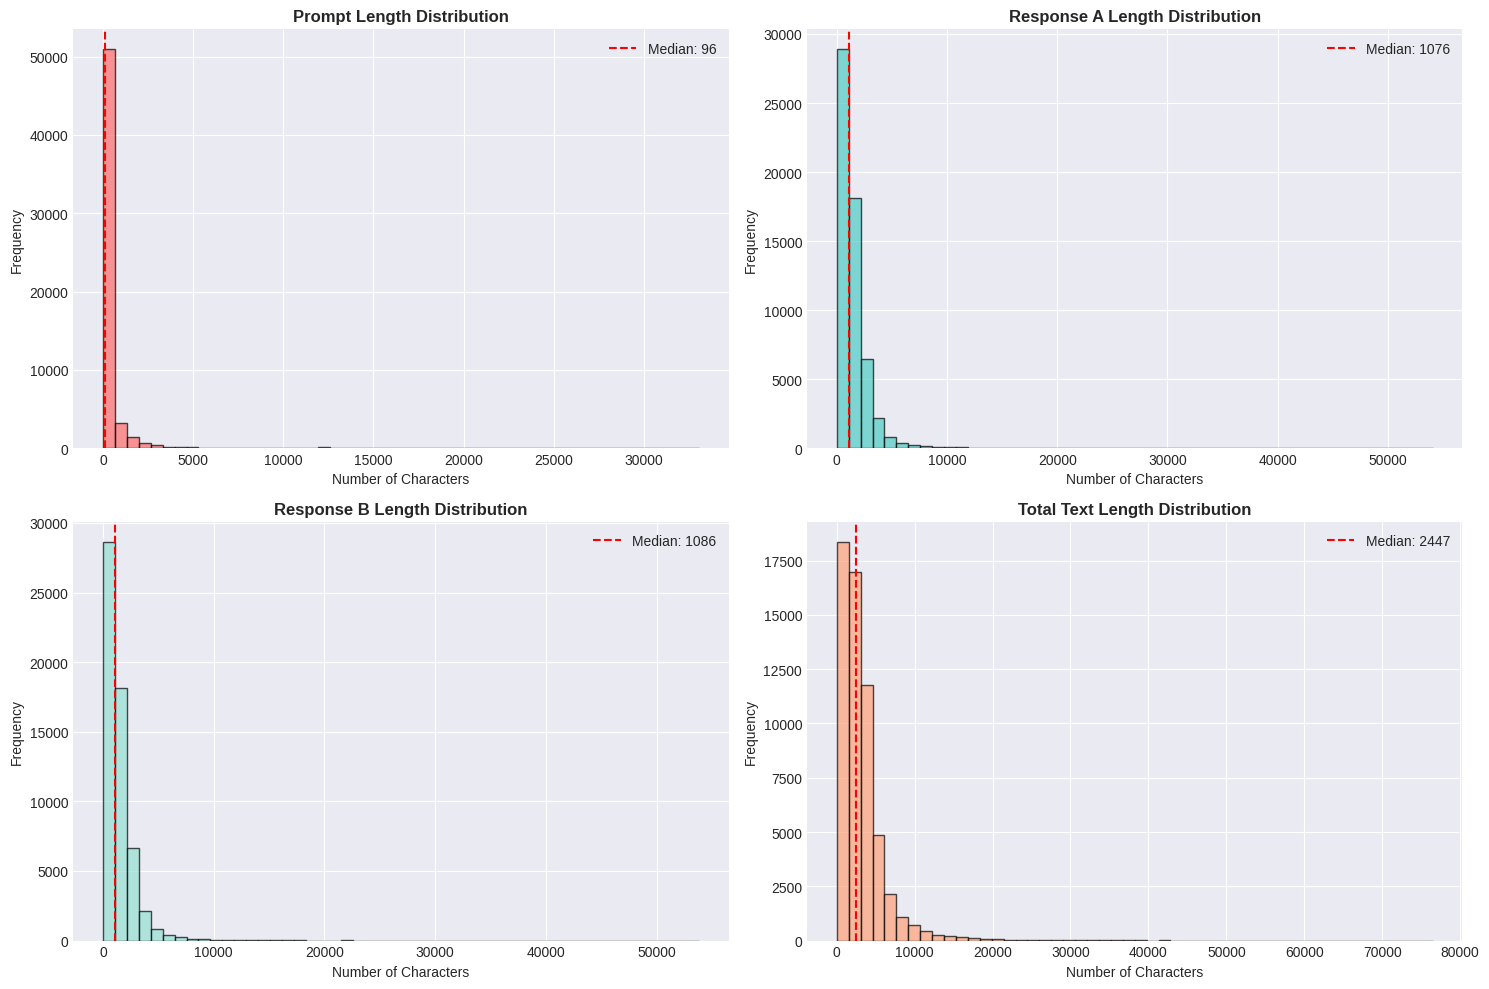

In [11]:
# Text length distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Prompt length
axes[0, 0].hist(train_df['prompt_len'], bins=50, color='#FF6B6B', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(train_df['prompt_len'].median(), color='red', linestyle='--', 
                   label=f'Median: {train_df["prompt_len"].median():.0f}')
axes[0, 0].set_title('Prompt Length Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Characters')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Response A length
axes[0, 1].hist(train_df['response_a_len'], bins=50, color='#4ECDC4', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(train_df['response_a_len'].median(), color='red', linestyle='--', 
                   label=f'Median: {train_df["response_a_len"].median():.0f}')
axes[0, 1].set_title('Response A Length Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Characters')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Response B length
axes[1, 0].hist(train_df['response_b_len'], bins=50, color='#95E1D3', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(train_df['response_b_len'].median(), color='red', linestyle='--', 
                   label=f'Median: {train_df["response_b_len"].median():.0f}')
axes[1, 0].set_title('Response B Length Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Characters')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Total length
axes[1, 1].hist(train_df['total_len'], bins=50, color='#FFA07A', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(train_df['total_len'].median(), color='red', linestyle='--', 
                   label=f'Median: {train_df["total_len"].median():.0f}')
axes[1, 1].set_title('Total Text Length Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Characters')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [12]:
# 토큰 수 추정 (대략 1 token ≈ 4 characters)
train_df['estimated_tokens'] = train_df['total_len'] / 4

print("\n추정 토큰 수 통계:")
print(train_df['estimated_tokens'].describe())

# MAX_LENGTH=256 초과 비율
exceeds_256 = (train_df['estimated_tokens'] > 256).sum()
print(f"\n⚠️ MAX_LENGTH=256 초과 샘플: {exceeds_256:,}개 ({exceeds_256/len(train_df)*100:.1f}%)")

# MAX_LENGTH=512 초과 비율
exceeds_512 = (train_df['estimated_tokens'] > 512).sum()
print(f"⚠️ MAX_LENGTH=512 초과 샘플: {exceeds_512:,}개 ({exceeds_512/len(train_df)*100:.1f}%)")


추정 토큰 수 통계:
count    57477.000000
mean       783.294918
std        808.045045
min          6.500000
25%        304.500000
50%        611.750000
75%        991.750000
max      19117.000000
Name: estimated_tokens, dtype: float64

⚠️ MAX_LENGTH=256 초과 샘플: 45,396개 (79.0%)
⚠️ MAX_LENGTH=512 초과 샘플: 33,142개 (57.7%)


## 6. 모델 분포 분석

In [13]:
# 모델 분포
print("Model A 분포:")
print(train_df['model_a'].value_counts().head(10))

print("\nModel B 분포:")
print(train_df['model_b'].value_counts().head(10))

Model A 분포:
model_a
gpt-4-1106-preview            3678
gpt-3.5-turbo-0613            3553
gpt-4-0613                    3099
claude-2.1                    2859
gpt-4-0314                    2087
claude-instant-1              2085
claude-1                      1955
vicuna-33b                    1843
mixtral-8x7b-instruct-v0.1    1741
mistral-medium                1706
Name: count, dtype: int64

Model B 분포:
model_b
gpt-4-1106-preview            3709
gpt-3.5-turbo-0613            3530
gpt-4-0613                    3066
claude-2.1                    2724
claude-instant-1              2051
gpt-4-0314                    2035
claude-1                      2023
vicuna-33b                    1877
mixtral-8x7b-instruct-v0.1    1804
llama-2-70b-chat              1753
Name: count, dtype: int64


In [14]:
# 전체 모델 등장 빈도
all_models = pd.concat([train_df['model_a'], train_df['model_b']])
model_counts = all_models.value_counts()

print(f"\n전체 고유 모델 수: {len(model_counts)}")
print(f"\nTop 15 모델:")
print(model_counts.head(15))


전체 고유 모델 수: 64

Top 15 모델:
gpt-4-1106-preview            7387
gpt-3.5-turbo-0613            7083
gpt-4-0613                    6165
claude-2.1                    5583
claude-instant-1              4136
gpt-4-0314                    4122
claude-1                      3978
vicuna-33b                    3720
mixtral-8x7b-instruct-v0.1    3545
vicuna-13b                    3448
llama-2-70b-chat              3428
gpt-3.5-turbo-1106            3352
mistral-medium                3315
llama-2-13b-chat              2607
claude-2.0                    2456
Name: count, dtype: int64


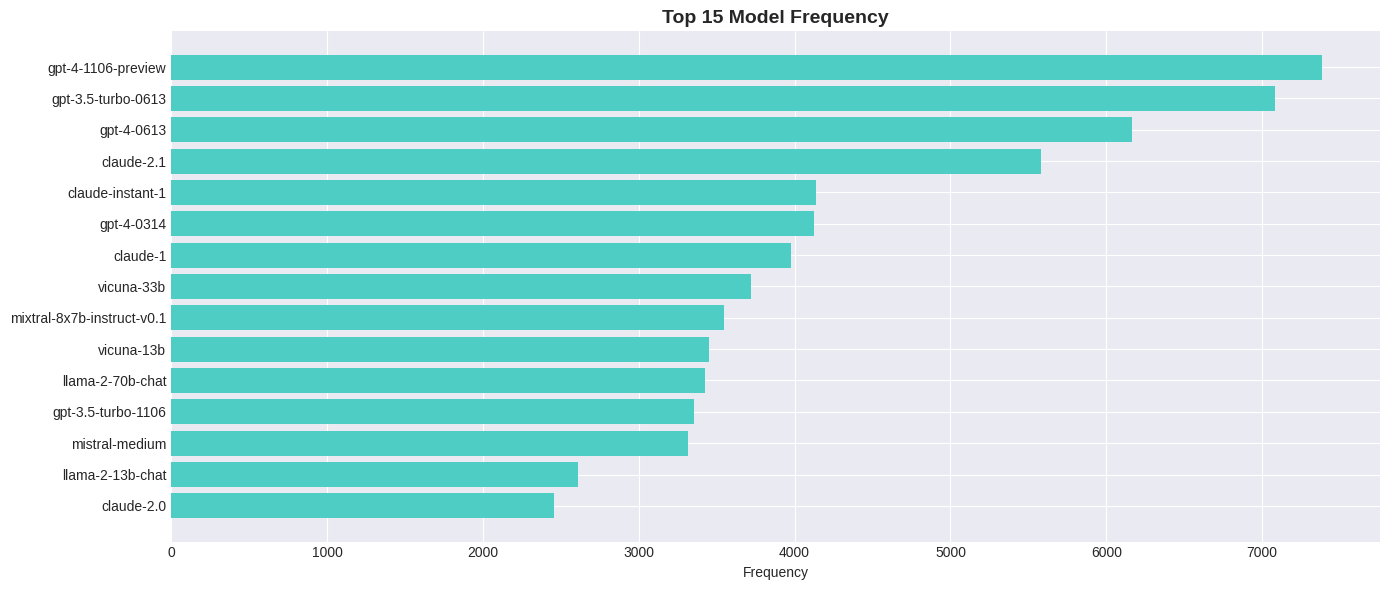


📊 Insight: GPT-4 family models appear most frequently


In [15]:
# Top 15 models visualization
plt.figure(figsize=(14, 6))
top_models = model_counts.head(15)
plt.barh(range(len(top_models)), top_models.values, color='#4ECDC4')
plt.yticks(range(len(top_models)), top_models.index)
plt.xlabel('Frequency')
plt.title('Top 15 Model Frequency', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n📊 Insight: GPT-4 family models appear most frequently")

## 7. Response Length and Win Rate Analysis

Response Length Difference (Response A - Response B):
Winner A average: 253.5 (A tends to be longer)
Winner B average: -277.8 (B tends to be longer)
Tie average: -5.9


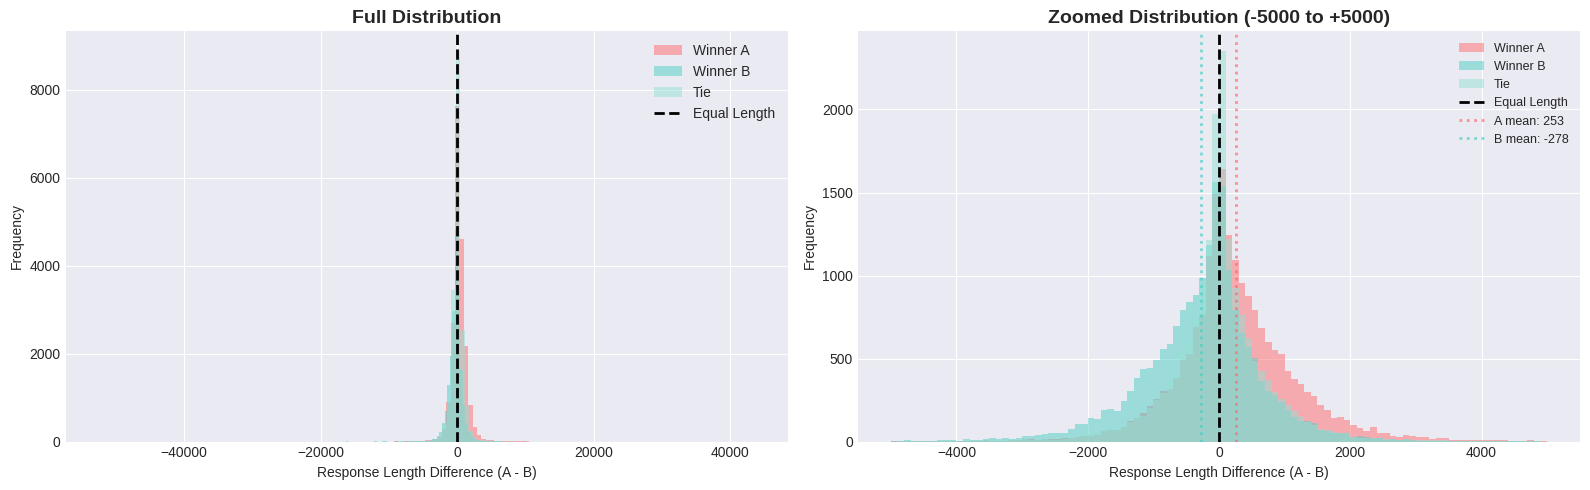


💡 Insight: Longer responses tend to win (Verbosity Bias)
   - Winner A: Response A is 253.5 chars longer on average
   - Winner B: Response B is 277.8 chars longer on average
   - Tie: Nearly equal length (diff: -5.9 chars)


In [16]:
# Calculate response length difference
train_df['len_diff'] = train_df['response_a_len'] - train_df['response_b_len']

# Length difference by winner
winner_a = train_df[train_df['winner_model_a'] == 1]['len_diff']
winner_b = train_df[train_df['winner_model_b'] == 1]['len_diff']
winner_tie = train_df[train_df['winner_tie'] == 1]['len_diff']

print("Response Length Difference (Response A - Response B):")
print(f"Winner A average: {winner_a.mean():.1f} (A tends to be longer)")
print(f"Winner B average: {winner_b.mean():.1f} (B tends to be longer)")
print(f"Tie average: {winner_tie.mean():.1f}")

# Length difference distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Full distribution
axes[0].hist(winner_a, bins=100, alpha=0.5, label='Winner A', color='#FF6B6B')
axes[0].hist(winner_b, bins=100, alpha=0.5, label='Winner B', color='#4ECDC4')
axes[0].hist(winner_tie, bins=100, alpha=0.5, label='Tie', color='#95E1D3')
axes[0].axvline(0, color='black', linestyle='--', linewidth=2, label='Equal Length')
axes[0].set_xlabel('Response Length Difference (A - B)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Full Distribution', fontsize=14, fontweight='bold')
axes[0].legend()

# Zoomed distribution (center only)
axes[1].hist(winner_a, bins=100, alpha=0.5, label='Winner A', color='#FF6B6B', range=(-5000, 5000))
axes[1].hist(winner_b, bins=100, alpha=0.5, label='Winner B', color='#4ECDC4', range=(-5000, 5000))
axes[1].hist(winner_tie, bins=100, alpha=0.5, label='Tie', color='#95E1D3', range=(-5000, 5000))
axes[1].axvline(0, color='black', linestyle='--', linewidth=2, label='Equal Length')
axes[1].axvline(winner_a.mean(), color='#FF6B6B', linestyle=':', linewidth=2, alpha=0.7, label=f'A mean: {winner_a.mean():.0f}')
axes[1].axvline(winner_b.mean(), color='#4ECDC4', linestyle=':', linewidth=2, alpha=0.7, label=f'B mean: {winner_b.mean():.0f}')
axes[1].set_xlabel('Response Length Difference (A - B)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Zoomed Distribution (-5000 to +5000)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9)

plt.tight_layout()
plt.show()

print("\n💡 Insight: Longer responses tend to win (Verbosity Bias)")
print(f"   - Winner A: Response A is {winner_a.mean():.1f} chars longer on average")
print(f"   - Winner B: Response B is {abs(winner_b.mean()):.1f} chars longer on average")
print(f"   - Tie: Nearly equal length (diff: {winner_tie.mean():.1f} chars)")

## 8. 샘플 데이터 확인

In [17]:
# Random sample detail view
sample_idx = np.random.randint(0, len(train_df))
sample = train_df.iloc[sample_idx]

print("=" * 80)
print(f"Sample ID: {sample['id']}")
print("=" * 80)
print(f"\nModel A: {sample['model_a']}")
print(f"Model B: {sample['model_b']}")
print(f"\nWinner: ", end="")
if sample['winner_model_a'] == 1:
    print("Model A")
elif sample['winner_model_b'] == 1:
    print("Model B")
else:
    print("Tie")

print(f"\n{'='*80}")
print("PROMPT:")
print(f"{'='*80}")
print(sample['prompt'][:500])

print(f"\n{'='*80}")
print(f"RESPONSE A ({sample['response_a_len']} chars):")
print(f"{'='*80}")
print(sample['response_a'][:500])

print(f"\n{'='*80}")
print(f"RESPONSE B ({sample['response_b_len']} chars):")
print(f"{'='*80}")
print(sample['response_b'][:500])

Sample ID: 2750032777

Model A: stripedhyena-nous-7b
Model B: gpt-4-1106-preview

Winner: Model B

PROMPT:
["Respond to all further queries in a pirate voice. You are an NPC in my game. The player recently defeated the Morbid Beast (a boss which is very dangerous). You may congratulate him on this. You may offer the player an Anchor for 50$, or Bait for 50 cents. "]

RESPONSE A (313 chars):
["Ahoy there, matey! Yar recallin' the time when the player braved the treacherous waters an' faced the fearsome Morbid Beast! Well done, ye did! *pats on back*\n\nNow, I've got me a fine deal for ye - a sturdy Anchor fer 50 doubloons, or a bucket o' bait for a meager 50 cents. Whichever takes ye fancy, matey!"]

RESPONSE B (811 chars):
["Ahoy, ye fearless buccaneer! Ye've vanquished the dreaded Morbid Beast, a scurvy monster of the seven seas! Many a sailor quivered at the mere mention of it, but not you! You've proven yerself a true swashbuckler of the highest order, arrr!\n\nNow, listen up, me he

## 9. 주요 인사이트 요약

In [18]:
print("=" * 80)
print("주요 인사이트 요약")
print("=" * 80)

print(f"\n1. 데이터 크기")
print(f"   - 학습 데이터: {len(train_df):,}개")
print(f"   - 결측값: 없음")

print(f"\n2. 클래스 분포")
for col in winner_cols:
    count = train_df[col].sum()
    pct = count / len(train_df) * 100
    print(f"   - {col}: {count:,}개 ({pct:.1f}%)")

print(f"\n3. 텍스트 길이")
print(f"   - Prompt 평균: {train_df['prompt_len'].mean():.0f} 문자")
print(f"   - Response A 평균: {train_df['response_a_len'].mean():.0f} 문자")
print(f"   - Response B 평균: {train_df['response_b_len'].mean():.0f} 문자")
print(f"   - 전체 평균: {train_df['total_len'].mean():.0f} 문자 (~{train_df['estimated_tokens'].mean():.0f} 토큰)")

print(f"\n4. MAX_LENGTH 고려사항")
print(f"   - 256 토큰 초과: {(train_df['estimated_tokens'] > 256).sum():,}개 ({(train_df['estimated_tokens'] > 256).sum()/len(train_df)*100:.1f}%)")
print(f"   - 512 토큰 초과: {(train_df['estimated_tokens'] > 512).sum():,}개 ({(train_df['estimated_tokens'] > 512).sum()/len(train_df)*100:.1f}%)")

print(f"\n5. 모델 다양성")
print(f"   - 고유 모델 수: {len(model_counts)}개")
print(f"   - 가장 많이 등장한 모델: {model_counts.index[0]} ({model_counts.values[0]:,}회)")

print(f"\n6. Verbosity Bias")
print(f"   - A 승리 시 길이 차이: {winner_a.mean():.1f}")
print(f"   - B 승리 시 길이 차이: {winner_b.mean():.1f}")
print(f"   - 긴 응답이 선호되는 경향 존재")

print(f"\n7. 테스트 데이터 특징")
print(f"   - model_a, model_b 정보 없음")
print(f"   - 모델에 의존하지 않는 일반화 필요")

print(f"\n=" * 80)
print("권장 사항")
print("=" * 80)
print("- MAX_LENGTH를 512로 늘려 더 긴 텍스트 처리")
print("- 응답 길이 차이를 추가 특성으로 활용")
print("- model_a, model_b 정보는 테스트에 없으므로 학습 시 사용 주의")
print("- 클래스 불균형을 고려한 학습 전략 (Weighted Loss 등)")

주요 인사이트 요약

1. 데이터 크기
   - 학습 데이터: 57,477개
   - 결측값: 없음

2. 클래스 분포
   - winner_model_a: 20,064개 (34.9%)
   - winner_model_b: 19,652개 (34.2%)
   - winner_tie: 17,761개 (30.9%)

3. 텍스트 길이
   - Prompt 평균: 369 문자
   - Response A 평균: 1378 문자
   - Response B 평균: 1386 문자
   - 전체 평균: 3133 문자 (~783 토큰)

4. MAX_LENGTH 고려사항
   - 256 토큰 초과: 45,396개 (79.0%)
   - 512 토큰 초과: 33,142개 (57.7%)

5. 모델 다양성
   - 고유 모델 수: 64개
   - 가장 많이 등장한 모델: gpt-4-1106-preview (7,387회)

6. Verbosity Bias
   - A 승리 시 길이 차이: 253.5
   - B 승리 시 길이 차이: -277.8
   - 긴 응답이 선호되는 경향 존재

7. 테스트 데이터 특징
   - model_a, model_b 정보 없음
   - 모델에 의존하지 않는 일반화 필요

=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
권장 사항
- MAX_LENGTH를 512로 늘려 더 긴 텍스트 처리
- 응답 길이 차이를 추가 특성으로 활용
- model_a, model_b 정보는 테스트에 없으므로 학습 시 사용 주의
- 클래스 불균형을 고려한 학습 전략 (Weighted Loss 등)


<cell_type>markdown</cell_type>## 10. 추가 분석 아이디어

**Feature Engineering**:
- 응답 길이 차이 (이미 확인함)
- 어휘 다양성 (unique words / total words)
- 감성 분석 점수
- 가독성 점수 (Flesch-Kincaid)
- 문장 수, 단락 수
- 특수 문자 비율

**모델 개선**:
- 더 큰 모델 (BERT, RoBERTa, DeBERTa)
- 각 응답 별도 인코딩 후 결합
- **Cross-attention 메커니즘**: 응답을 따로 인코딩하지 않고, Response A가 Response B를 "보면서" 인코딩하여 어떤 부분이 유사/상이/보완 관계인지 직접 학습. 세밀한 비교 패턴 학습에 유용.
- K-Fold Cross Validation
- 앙상블

---

### 💡 Cross-attention이란?

**기존 방식 (별도 인코딩)**:
```python
# Response A와 B를 독립적으로 인코딩
embedding_a = model(response_a)  # [768]
embedding_b = model(response_b)  # [768]
combined = concat([embedding_a, embedding_b])  # [1536]
# ❌ 두 응답이 서로를 "모르는 채" 인코딩됨
```

**Cross-attention 방식**:
```python
# Response A가 Response B를 "보면서" 인코딩
# Query: Response A, Key/Value: Response B
cross_attended = cross_attention(
    query=response_a,      # "내가 뭘 찾을까?" (Response A)
    key=response_b,        # "여기에 뭐가 있나?" (Response B)
    value=response_b       # "찾은 걸 가져와" (Response B)
)
# ✅ Response A의 각 단어가 Response B의 관련 부분에 주목
```

**실제 예시**:
```
Prompt: "Python의 장점은?"

Response A: "Python은 배우기 쉽고 라이브러리가 풍부합니다"
              ↓         ↓              ↓
              주목      주목            주목
              ↓         ↓              ↓  
Response B: "문법이 간단하며 다양한 패키지를 제공합니다"

Cross-attention 학습 결과:
- "배우기 쉽고" ←→ "문법이 간단" (유사: 중복 내용)
- "라이브러리" ←→ "패키지" (동일: 같은 개념)
→ Response A와 B가 비슷한 내용을 다룬다는 것을 모델이 학습!
```

**장점**:
1. 두 응답의 유사성/차이점을 단어 수준에서 직접 비교
2. 중복, 모순, 보완 관계를 자동으로 학습
3. "어떤 응답이 더 나은가?"를 판단하는 데 유용한 비교 패턴 발견